 #  <div style="text-align: center">  Spatiotemporal PM10 concentration prediction </div> 
###  <div style="text-align: center">by Plume Labs</div> 
<img src='https://plumelabs.com/plume-labs-logo.png' width="300">
<div style="text-align: center"> <a href="https://challengedata.ens.fr/participants/challenges/7/"> Challenge link </a></div> 

### <div style="text-align:center"> Kernel By: <b> Kamal Chouhbi & Anas Cherradi</b></div>

 <a id="top"></a> <br>
## Notebook  Content
1. [Introduction](#1)
1. [Load packages](#2)
    1. [import](#21)
    1. [Setup](#22)
    1. [Version](#23)
1. [Problem Definition](#3)
    1. [Problem Feature](#31)
    1. [Aim](#32)
    1. [Variables](#33)
    1. [Evaluation](#34)
1. [Exploratory Data Analysis(EDA)](#4)
    1. [Data Collection](#41)
    1. [Data Preprocessing](#42)
    1. [Visualization](#43)
1. [Process ML Models](#5)
    1. [Linear Regression](#51)
    1. [Ridge Model](#52)
    1. [Lasso Model](#53)
    1. [Gradient Boosting Regression](#54)
    1. [Random Forest Regression](#55)
    1. [Xgboost](#56)
    1. [LGBM Regressor](#57)
1. [Model Comparison](#6)
1. [Blending + Submission](#7)

 <a id="1"></a> <br>
## 1- Introduction

At [Plume Labs](https://plumelabs.com/en/) their mission is to make air quality information accessible and empowering. They build personal devices and apps that help mesure everyone's exposure, plan his journeys and activities, improve his home and workplace, and persuade decision makers.

Leveraging the best of machine learning and atmospheric sciences, they’ve built an API that does forecast pollution data. The live air quality data and hourly forecasts make the air more transparent, and empower businesses, researchers and organizations to build solutions that help people breathe better air.

<a href="https://plume.io/static/video/timelapse.webm" title="Link Title"><img src="https://plumelabs.com/static/7831da824582f3b74af61c1e0b483c09/a9a1e/api.webp" alt="Alternate Text" width=300 /></a>

They combine machine learning with atmospheric models to deliver real-time and hourly forecast air quality data.

 <a id="2"></a> <br>
 ## 2- Load packages
  <a id="21"></a> <br>
## 2-A Import

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from pdpbox import pdp, get_dataset, info_plots
from eli5.sklearn import PermutationImportance
import matplotlib.pyplot as plt
from sklearn import ensemble
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
import eli5
import sys

Using TensorFlow backend.


 <a id="22"></a> <br>
##  2-B Setup

In [2]:
%matplotlib inline
%precision 4
warnings.filterwarnings('ignore')
plt.style.use('ggplot')
np.set_printoptions(suppress=True)
pd.set_option("display.precision", 15)
sns.set(style="ticks", color_codes=True)

 <a id="23"></a> <br>
## 2-C Version

In [51]:
print('pandas: {}'.format(pd.__version__))
print('numpy: {}'.format(np.__version__))
print('Python: {}'.format(sys.version))

pandas: 0.24.2
numpy: 1.16.2
Python: 3.7.3 (default, Mar 27 2019, 17:13:21) [MSC v.1915 64 bit (AMD64)]


 <a id="3"></a> <br>
 ## 3- Problem Definition
 
In this challenge, we should help this company predictin the **PM10** readings of some air quality monitoring stations using the readings provided by the monitoring stations nearby as well as urban features. The data provided for this competition has the same structure as the real data we have available to solve this problem.

<a id="31"></a> 
### 3-1 Problem Feature

1. **x_train** - input data of the training set
1. **y_train** - output data of the training set
1. **x_test** - input data of the testing set

<a id="32"></a> 
### 3-2 Aim
In this challenge, the task is to predict the value of **target** column for the x_test set.

<a id="33"></a> 
### 3-3 Variables

We are provided with a **dataset containing numeric feature variables**, the numeric **target** column, and a numeric **Station_ID** column.

The task is to predict the value of **target column** for the test set.

<a id="34"></a> 
## 3-4 evaluation

**Submissions** are evaluated using the RMSLE metric:
<img src='https://secureservercdn.net/160.153.137.16/70j.58d.myftpupload.com/wp-content/uploads/2019/03/rmsle-2.png' width=500>

In [4]:
from sklearn.metrics import mean_squared_log_error

<a id="4"></a> 
## 4- Exploratory Data Analysis(EDA)
 In this section, we'll analysis how to use graphical and numerical techniques to begin uncovering the structure of your data. 
*  Data Collection
*  Visualization
*  Data Preprocessing
*  Data Cleaning
<img src="https://miro.medium.com/max/1130/1*3sr-fMg4S_yEncGsIjyG9A.png" width=400 height=400>

 <a id="41"></a> <br>
## 4-1 Data Collection

In [2]:
# import train & test Datasets
data_input = pd.read_csv('training_input_lat8cht.csv')
data_output = pd.read_csv('training_output_Z18GQCh.csv')
data_test = pd.read_csv('testing_input_A9o5RSM.csv')
print(data_input.shape, data_output.shape, data_test.shape)

(695255, 36) (695255, 2) (247473, 36)


In [6]:
data_input.head()

,ID,station_id,hdres_100,hdres_500,ldres_100,ldres_500,industry_100,industry_500,urbgreen_100,urbgreen_500,...,value_0,value_1,value_2,value_3,value_4,value_5,value_6,value_7,value_8,value_9
0,0,105,0.0,0.0,1.0,0.929,0.0,0.033,0.0,0.022,...,53.0,46.0,52.0,44.0,40.0,38.0,54.0,36.0,39.0,42.0
1,1,105,0.0,0.0,1.0,0.929,0.0,0.033,0.0,0.022,...,55.0,47.0,54.0,45.0,41.0,39.0,55.0,37.0,40.0,43.0
2,2,105,0.0,0.0,1.0,0.929,0.0,0.033,0.0,0.022,...,84.5,54.0,78.0,49.0,47.0,42.0,63.0,42.0,48.0,49.0
3,3,105,0.0,0.0,1.0,0.929,0.0,0.033,0.0,0.022,...,97.0,59.0,84.0,55.0,58.0,48.0,72.0,51.0,57.0,59.0
4,4,105,0.0,0.0,1.0,0.929,0.0,0.033,0.0,0.022,...,99.0,67.0,95.0,63.0,67.0,48.0,82.0,59.0,64.0,65.0


In [7]:
data_test.head()

,ID,station_id,hdres_100,hdres_500,ldres_100,ldres_500,industry_100,industry_500,urbgreen_100,urbgreen_500,...,value_0,value_1,value_2,value_3,value_4,value_5,value_6,value_7,value_8,value_9
0,0,98,0.0,0.0,0.349,0.503,0.0,0.052,0.651,0.354,...,46.0,53.0,48.0,44.0,54.0,40.0,38.0,36.0,42.0,39.0
1,1,98,0.0,0.0,0.349,0.503,0.0,0.052,0.651,0.354,...,47.0,55.0,50.0,45.0,55.0,41.0,39.0,37.0,43.0,40.0
2,2,98,0.0,0.0,0.349,0.503,0.0,0.052,0.651,0.354,...,54.0,84.5,62.0,49.0,63.0,47.0,42.0,42.0,49.0,48.0
3,3,98,0.0,0.0,0.349,0.503,0.0,0.052,0.651,0.354,...,59.0,97.0,67.0,55.0,72.0,58.0,48.0,51.0,59.0,57.0
4,4,98,0.0,0.0,0.349,0.503,0.0,0.052,0.651,0.354,...,67.0,99.0,75.0,63.0,82.0,67.0,48.0,59.0,65.0,64.0


In [4]:
data = pd.concat([data_input,data_output.value], axis=1)
data.head()

,ID,station_id,hdres_100,hdres_500,ldres_100,ldres_500,industry_100,industry_500,urbgreen_100,urbgreen_500,...,value_1,value_2,value_3,value_4,value_5,value_6,value_7,value_8,value_9,value
0,0,105,0.0,0.0,1.0,0.929,0.0,0.033,0.0,0.022,...,46.0,52.0,44.0,40.0,38.0,54.0,36.0,39.0,42.0,48.0
1,1,105,0.0,0.0,1.0,0.929,0.0,0.033,0.0,0.022,...,47.0,54.0,45.0,41.0,39.0,55.0,37.0,40.0,43.0,50.0
2,2,105,0.0,0.0,1.0,0.929,0.0,0.033,0.0,0.022,...,54.0,78.0,49.0,47.0,42.0,63.0,42.0,48.0,49.0,62.0
3,3,105,0.0,0.0,1.0,0.929,0.0,0.033,0.0,0.022,...,59.0,84.0,55.0,58.0,48.0,72.0,51.0,57.0,59.0,67.0
4,4,105,0.0,0.0,1.0,0.929,0.0,0.033,0.0,0.022,...,67.0,95.0,63.0,67.0,48.0,82.0,59.0,64.0,65.0,75.0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 695255 entries, 0 to 695254
Data columns (total 37 columns):
ID                        695255 non-null int64
station_id                695255 non-null int64
hdres_100                 695255 non-null float64
hdres_500                 695255 non-null float64
ldres_100                 695255 non-null float64
ldres_500                 695255 non-null float64
industry_100              695255 non-null float64
industry_500              695255 non-null float64
urbgreen_100              695255 non-null float64
urbgreen_500              695255 non-null float64
roads_length_25           695255 non-null float64
roads_length_100          695255 non-null float64
roads_length_500          695255 non-null float64
major_roads_length_25     695255 non-null float64
major_roads_length_100    695255 non-null float64
major_roads_length_500    695255 non-null float64
distance_0                695255 non-null float64
distance_1                695255 non-null f

In [9]:
data.describe()

,ID,station_id,hdres_100,hdres_500,ldres_100,ldres_500,industry_100,industry_500,urbgreen_100,urbgreen_500,...,value_1,value_2,value_3,value_4,value_5,value_6,value_7,value_8,value_9,value
count,695255.000000000000000,695255.000000000000000,695255.000000000000000,695255.000000000000000,695255.000000000000000,695255.000000000000000,695255.000000000000000,695255.000000000000000,695255.000000000000000,695255.000000000000000,...,665010.000000000000000,674504.000000000000000,681336.000000000000000,678694.000000000000000,684522.000000000000000,683945.000000000000000,661804.000000000000000,665846.000000000000000,660610.000000000000000,695255.000000000000000
mean,347627.000000000000000,56.045082739426540,0.308561314913417,0.247021143321375,0.441394610609926,0.451669078253293,0.122346257128543,0.147390543037818,0.050757747876634,0.063606253820430,...,22.533732295755460,22.768078024741762,23.011442942982644,22.720934874921543,23.509117181040818,23.469856412431298,23.953564828862643,22.079436267545685,20.693500894628382,22.692011545404348
std,200702.975039167504292,34.073491124775792,0.432018578384637,0.349114999377007,0.446854349203283,0.362122392443833,0.280902366015158,0.223060746004699,0.181544787647542,0.140639056657387,...,16.334317789811951,16.258749075162889,16.339404081820010,16.282153506399386,17.496717793375733,17.112804632261703,18.234071823234043,14.864382379427450,14.681315407620689,16.855357690476762
min,0.000000000000000,0.000000000000000,0.000000000000000,0.000000000000000,0.000000000000000,0.000000000000000,0.000000000000000,0.000000000000000,0.000000000000000,0.000000000000000,...,2.000000000000000,2.000000000000000,2.000000000000000,2.000000000000000,2.000000000000000,2.000000000000000,2.000000000000000,2.000000000000000,2.000000000000000,2.000000000000000
25%,173813.500000000000000,24.000000000000000,0.000000000000000,0.000000000000000,0.000000000000000,0.033000000000000,0.000000000000000,0.000000000000000,0.000000000000000,0.000000000000000,...,12.199999999999999,12.900000000000000,13.000000000000000,12.324999999999999,12.577999999999999,13.000000000000000,13.000000000000000,12.699999999999999,12.000000000000000,12.000000000000000
50%,347627.000000000000000,59.000000000000000,0.000000000000000,0.000000000000000,0.224000000000000,0.462000000000000,0.000000000000000,0.025000000000000,0.000000000000000,0.007000000000000,...,18.100000000000001,19.000000000000000,19.000000000000000,18.699999999999999,19.000000000000000,19.000000000000000,19.000000000000000,18.000000000000000,17.000000000000000,18.199999999999999
75%,521440.500000000000000,86.000000000000000,0.784000000000000,0.527000000000000,1.000000000000000,0.811000000000000,0.008000000000000,0.256000000000000,0.000000000000000,0.065000000000000,...,28.000000000000000,28.021000000000001,28.399999999999999,28.000000000000000,29.000000000000000,28.300000000000001,29.199999999999999,27.000000000000000,25.000000000000000,28.000000000000000
max,695254.000000000000000,114.000000000000000,1.000000000000000,0.991000000000000,1.000000000000000,0.999000000000000,1.000000000000000,0.967000000000000,1.000000000000000,0.981000000000000,...,718.000000000000000,718.000000000000000,562.000000000000000,635.600000000000023,635.600000000000023,635.600000000000023,635.600000000000023,516.000000000000000,718.000000000000000,718.000000000000000


 <a id="42"></a> <br>
## 4-2 Data Preprocessing

 <a id="421"></a> <br>
## 4-2-1 Check missing data for test & train

In [10]:
# we have some missing values in train
data_input.isnull().any()

ID                        False
station_id                False
hdres_100                 False
hdres_500                 False
ldres_100                 False
ldres_500                 False
industry_100              False
industry_500              False
urbgreen_100              False
urbgreen_500              False
roads_length_25           False
roads_length_100          False
roads_length_500          False
major_roads_length_25     False
major_roads_length_100    False
major_roads_length_500    False
distance_0                False
distance_1                False
distance_2                False
distance_3                False
distance_4                False
distance_5                False
distance_6                False
distance_7                False
distance_8                False
distance_9                False
value_0                    True
value_1                    True
value_2                    True
value_3                    True
value_4                    True
value_5 

We noticed that the columns corresponding to the readings at the 10 closest monitoring stations contain some **missing values**. Which means that the corresponding monitoring stations did not return any value at this moment.

In [12]:
# we have also missing values in test
data_test.isnull().any()

ID                        False
station_id                False
hdres_100                 False
hdres_500                 False
ldres_100                 False
ldres_500                 False
industry_100              False
industry_500              False
urbgreen_100              False
urbgreen_500              False
roads_length_25           False
roads_length_100          False
roads_length_500          False
major_roads_length_25     False
major_roads_length_100    False
major_roads_length_500    False
distance_0                False
distance_1                False
distance_2                False
distance_3                False
distance_4                False
distance_5                False
distance_6                False
distance_7                False
distance_8                False
distance_9                False
value_0                    True
value_1                    True
value_2                    True
value_3                    True
value_4                    True
value_5 

The same thing for the test dataset. 

 <a id="422"></a> <br>
## 4-2-2 Imputing Null Values

In this large data, we have a lot of missing values in the cells. In order to effectively train our model, we must first deal with the missing values. For numerical imputing, we will try to fill the missing values with the mean of each station based on its ID.

In [8]:
training_null = pd.isnull(data).sum()
testing_null = pd.isnull(data_test).sum()

null = pd.concat([training_null, testing_null], axis=1, keys=["Training", "Testing"])
null

,Training,Testing
ID,0,0.0
distance_0,0,0.0
distance_1,0,0.0
distance_2,0,0.0
distance_3,0,0.0
distance_4,0,0.0
distance_5,0,0.0
distance_6,0,0.0
distance_7,0,0.0
distance_8,0,0.0


Actually we have two options : choosing between filling with the mean or the median, and these measures can be applied on the train, test or both at the same time.

In [12]:
data_Land_Use = data.loc[:,'hdres_100' : 'urbgreen_500']
data_Roads = data.loc[:, 'roads_length_25':'major_roads_length_500']
data_Readings = data.loc[:,'value_0':'value_9']

In [13]:
cols = list(data_Readings.dtypes.index)
cols

['value_0',
 'value_1',
 'value_2',
 'value_3',
 'value_4',
 'value_5',
 'value_6',
 'value_7',
 'value_8',
 'value_9']

In [321]:
#Mean
##for i in cols:
##    data[i] = data.groupby("station_id").transform(lambda x: x.fillna(x.mean()))[i]
 ##   data_test[i] = data_test.groupby("station_id").transform(lambda x: x.fillna(x.mean()))[i]

#Median
for i in cols:
    data[i] = data.groupby("station_id").transform(lambda x: x.fillna(x.median()))[i]
    data_test[i] = data_test.groupby("station_id").transform(lambda x: x.fillna(x.median()))[i]

Let's check how many null values are remaining:

In [322]:
training_null = pd.isnull(data).sum()
testing_null = pd.isnull(data_test).sum()

null = pd.concat([training_null, testing_null], axis=1, keys=["Training", "Testing"])
null[null.sum(axis=1) > 0]

,Training,Testing


If it works successful, the code above should print an empty table.

 <a id="423"></a> <br>
## 4-2-3 Reducing  memory size by ~ 50%

We noticed the size of the properties dataset is pretty big **(196 MB)**  so we decided to make the dataset smaller without losing information.
It is important to verify first the different ranges for each variable in the dataset. Check ranges <a href="https://clickhouse-docs.readthedocs.io/en/latest/data_types/int_uint.html">here</a>

Because we make a lot of calculations in this kernel, we'd better reduce the size of the data.
1. 196 MB before Reducing
1. 98 MB after Reducing

It uses the following approach:

- Iterate over every column
- Determine if the column is numeric
- Determine if the column can be represented by an integer
- Find the min and the max value
- Determine and apply the smallest datatype that can fit the range of values

In [18]:
#Based on this great kernel https://www.kaggle.com/arjanso/reducing-dataframe-memory-size-by-65

def reduce_mem_usage(df):
    start_mem_usg = df.memory_usage().sum() / 1024**2 
    print("Memory usage of properties dataframe is :",start_mem_usg," MB")
    NAlist = [] # Keeps track of columns that have missing values filled in. 
    for col in df.columns:
        if df[col].dtype != object:  # Exclude strings
            
            # Print current column type
            print("******************************")
            print("Column: ",col)
            print("dtype before: ",df[col].dtype)
            
            # make variables for Int, max and min
            IsInt = False
            mx = df[col].max()
            mn = df[col].min()
            
            # Integer does not support NA, therefore, NA needs to be filled
            if not np.isfinite(df[col]).all(): 
                NAlist.append(col)
                df[col].fillna(mn-1,inplace=True)  
                   
            # test if column can be converted to an integer
            asint = df[col].fillna(0).astype(np.int64)
            result = (df[col] - asint)
            result = result.sum()
            if result > -0.01 and result < 0.01:
                IsInt = True

            
            # Make Integer/unsigned Integer datatypes
            if IsInt:
                if mn >= 0:
                    if mx < 255:
                        df[col] = df[col].astype(np.uint8)
                    elif mx < 65535:
                        df[col] = df[col].astype(np.uint16)
                    elif mx < 4294967295:
                        df[col] = df[col].astype(np.uint32)
                    else:
                        df[col] = df[col].astype(np.uint64)
                else:
                    if mn > np.iinfo(np.int8).min and mx < np.iinfo(np.int8).max:
                        df[col] = df[col].astype(np.int8)
                    elif mn > np.iinfo(np.int16).min and mx < np.iinfo(np.int16).max:
                        df[col] = df[col].astype(np.int16)
                    elif mn > np.iinfo(np.int32).min and mx < np.iinfo(np.int32).max:
                        df[col] = df[col].astype(np.int32)
                    elif mn > np.iinfo(np.int64).min and mx < np.iinfo(np.int64).max:
                        df[col] = df[col].astype(np.int64)    
            
            # Make float datatypes 32 bit
            else:
                df[col] = df[col].astype(np.float32)
            
            # Print new column type
            print("dtype after: ",df[col].dtype)
            print("******************************")
    
    # Print final result
    print("___MEMORY USAGE AFTER COMPLETION:___")
    mem_usg = df.memory_usage().sum() / 1024**2 
    print("Memory usage is: ",mem_usg," MB")
    print("This is ",100*mem_usg/start_mem_usg,"% of the initial size")
    return df, NAlist

In [19]:
data, NAlist = reduce_mem_usage(data)
print("_________________")
print("")
print("Warning: the following columns have missing values filled with 'df['column_name'].min() -1': ")
print("_________________")
print("")
print(NAlist)

Memory usage of properties dataframe is : 196.2619400024414  MB
******************************
Column:  ID
dtype before:  int64
dtype after:  uint32
******************************
******************************
Column:  station_id
dtype before:  int64
dtype after:  uint8
******************************
******************************
Column:  hdres_100
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  hdres_500
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  ldres_100
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  ldres_500
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  industry_100
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  industry_500
dtype befor

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 695255 entries, 0 to 695254
Data columns (total 37 columns):
ID                        695255 non-null uint32
station_id                695255 non-null uint8
hdres_100                 695255 non-null float32
hdres_500                 695255 non-null float32
ldres_100                 695255 non-null float32
ldres_500                 695255 non-null float32
industry_100              695255 non-null float32
industry_500              695255 non-null float32
urbgreen_100              695255 non-null float32
urbgreen_500              695255 non-null float32
roads_length_25           695255 non-null float32
roads_length_100          695255 non-null float32
roads_length_500          695255 non-null float32
major_roads_length_25     695255 non-null float32
major_roads_length_100    695255 non-null float32
major_roads_length_500    695255 non-null float32
distance_0                695255 non-null float32
distance_1                695255 non-null 

In [21]:
data_test, NAlist = reduce_mem_usage(data_test)
data_Readings, NAlist = reduce_mem_usage(data_Readings)
data_Roads, NAlist = reduce_mem_usage(data_Roads)
data_Land_Use, NAlist = reduce_mem_usage(data_Land_Use)


Memory usage of properties dataframe is : 67.97056579589844  MB
******************************
Column:  ID
dtype before:  int64
dtype after:  uint32
******************************
******************************
Column:  station_id
dtype before:  int64
dtype after:  uint8
******************************
******************************
Column:  hdres_100
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  hdres_500
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  ldres_100
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  ldres_500
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  industry_100
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  industry_500
dtype befor

#### Data set fields

In [133]:
data_input.columns

Index(['ID', 'station_id', 'hdres_100', 'hdres_500', 'ldres_100', 'ldres_500',
       'industry_100', 'industry_500', 'urbgreen_100', 'urbgreen_500',
       'roads_length_25', 'roads_length_100', 'roads_length_500',
       'major_roads_length_25', 'major_roads_length_100',
       'major_roads_length_500', 'distance_0', 'distance_1', 'distance_2',
       'distance_3', 'distance_4', 'distance_5', 'distance_6', 'distance_7',
       'distance_8', 'distance_9', 'value_0', 'value_1', 'value_2', 'value_3',
       'value_4', 'value_5', 'value_6', 'value_7', 'value_8', 'value_9'],
      dtype='object')

In [134]:
print(len(data_input.columns))

36


 <a id="43"></a> <br>
## 4-3 Visualization

### Plot the evolution of PM10 concentration at each station

In [14]:
data['station_id'].value_counts().head()

85    8779
34    8779
64    8779
30    8779
66    8779
Name: station_id, dtype: int64

In [15]:
data_vis = pd.concat([data.station_id,data.value], axis=1)
data_vis2 = data_vis[data_vis['station_id']==28]
data_vis3 =  data_vis[data_vis['station_id']==3]

(0, 300)

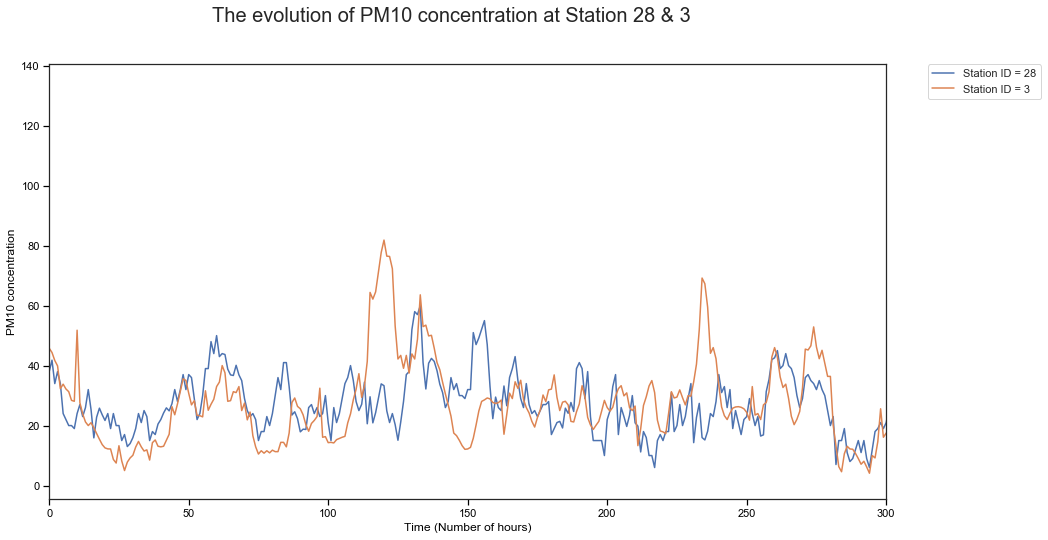

In [16]:
x = np.arange(0,8779)
fig, ax1 = plt.subplots(figsize=(15,8))
ax1.plot(x,data_vis2.value, label='Station ID = 28')
ax1.plot(x,data_vis3.value, label='Station ID = 3')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
fig.suptitle("The evolution of PM10 concentration at Station 28 & 3 ", fontsize=20)
ax1.set_ylabel('PM10 concentration', color='black', fontsize=12)
ax1.tick_params(axis='y', colors='black')
ax1.set_xlabel('Time (Number of hours)', color='black', fontsize=12)
ax1.tick_params(axis='x', colors='black')
ax1.set_xlim(0,300)

For each station, we can observe many amplitudes of oscillations.

### Histogram Distribution Plots

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022CABFD77B8>,
      dtype=object)

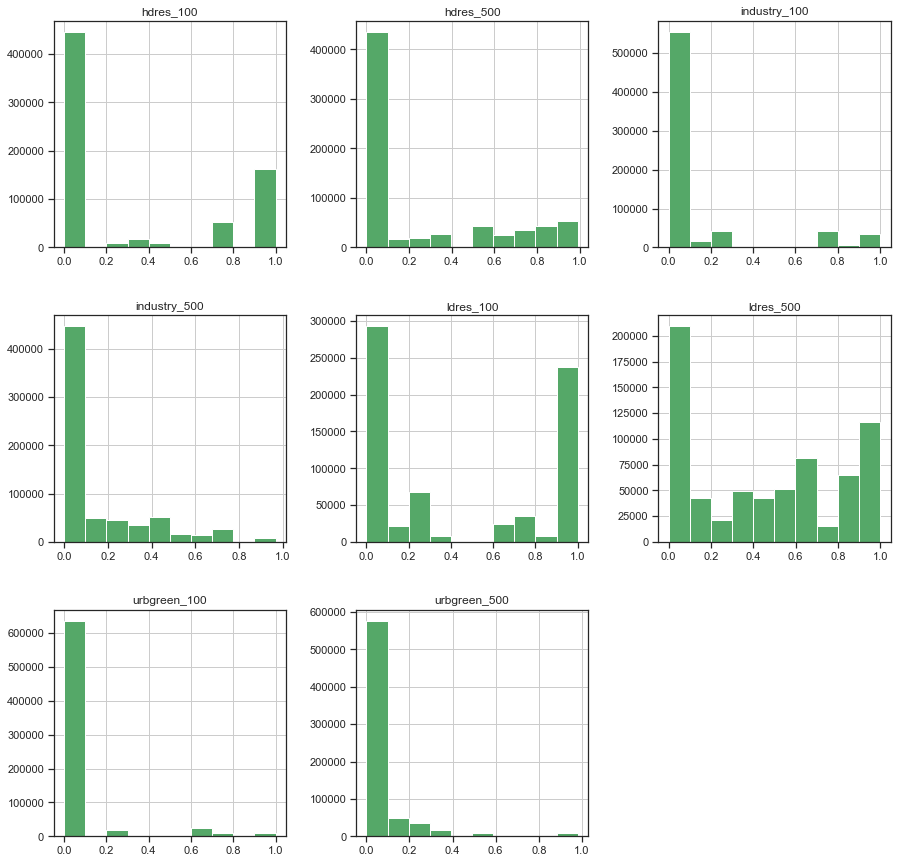

In [18]:
data_Land_Use.hist(figsize=(15,15),bins=10, color='g')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022CABFC9278>,
      dtype=object)

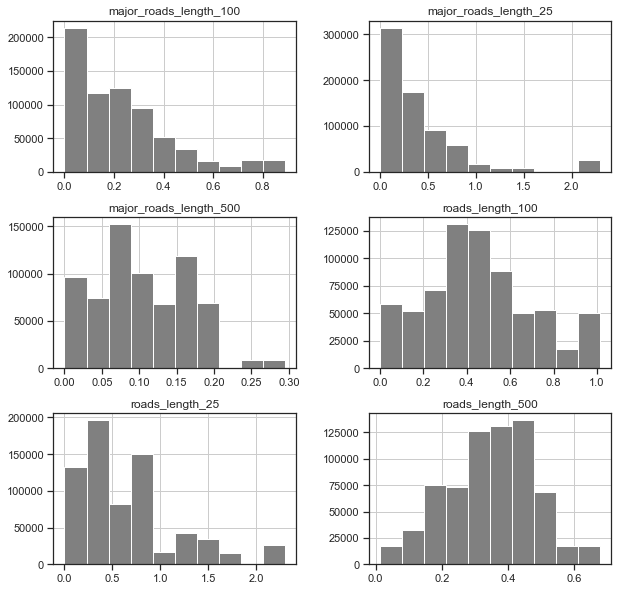

In [19]:
data_Roads.hist(figsize=(10,10),bins=10, color='gray')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F7918B5F28>,
      dtype=object)

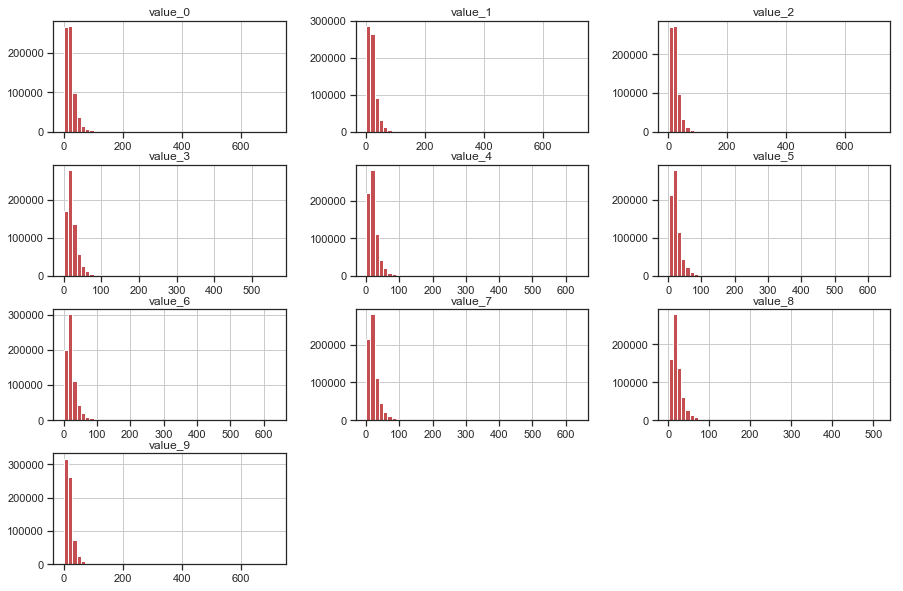

In [102]:
data_Readings.hist(figsize=(15,10),bins=50, color='r')

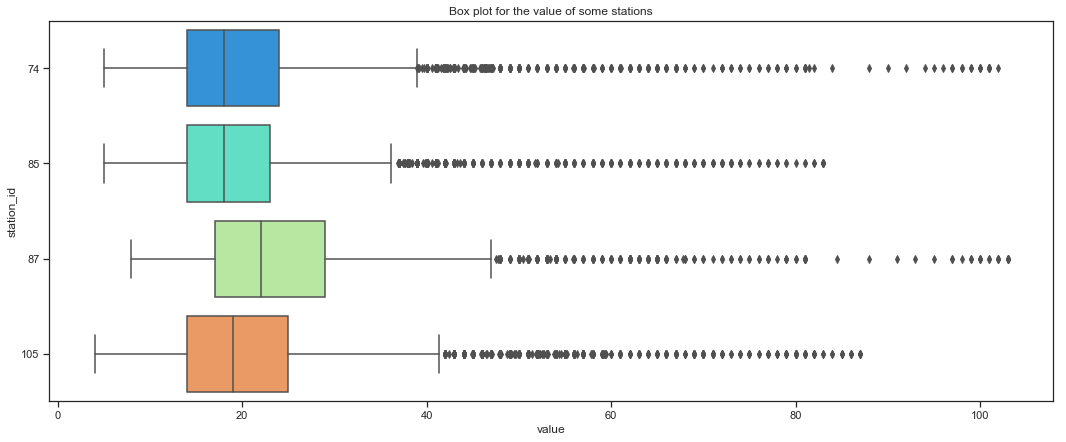

In [107]:
plt.figure(figsize=(18,7))
plt.title("Box plot for the value of some stations")
data_boxplot=data.loc[0:30000,:]
sns.boxplot(y="station_id", x="value", data = data_boxplot , orient="h", palette = 'rainbow')

(0, 120)

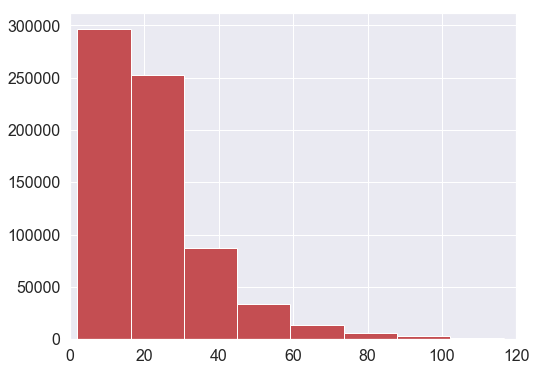

In [35]:
fig, ax1 = plt.subplots(figsize=(8,6))
data['value'].hist(figsize=(8,6),bins=50, ax=ax1, color='r')
ax1.set_xlim(0,120)

Now let's calculate the Skewness and Kurtosis :

In [21]:
#skewness & kurtosis
print("Skewness: %f" % data['value'].skew())
print("Kurtosis: %f" % data['value'].kurt())

Skewness: 3.337862
Kurtosis: 34.961417


As we've seen before, there are so many columns to work with, so let's try to figure out the correlations to get a better idea of which columns are strongly related to the **Value column** corresponding to the **Spatiotemporal PM10** concentration.

### Correlation Matrix plots

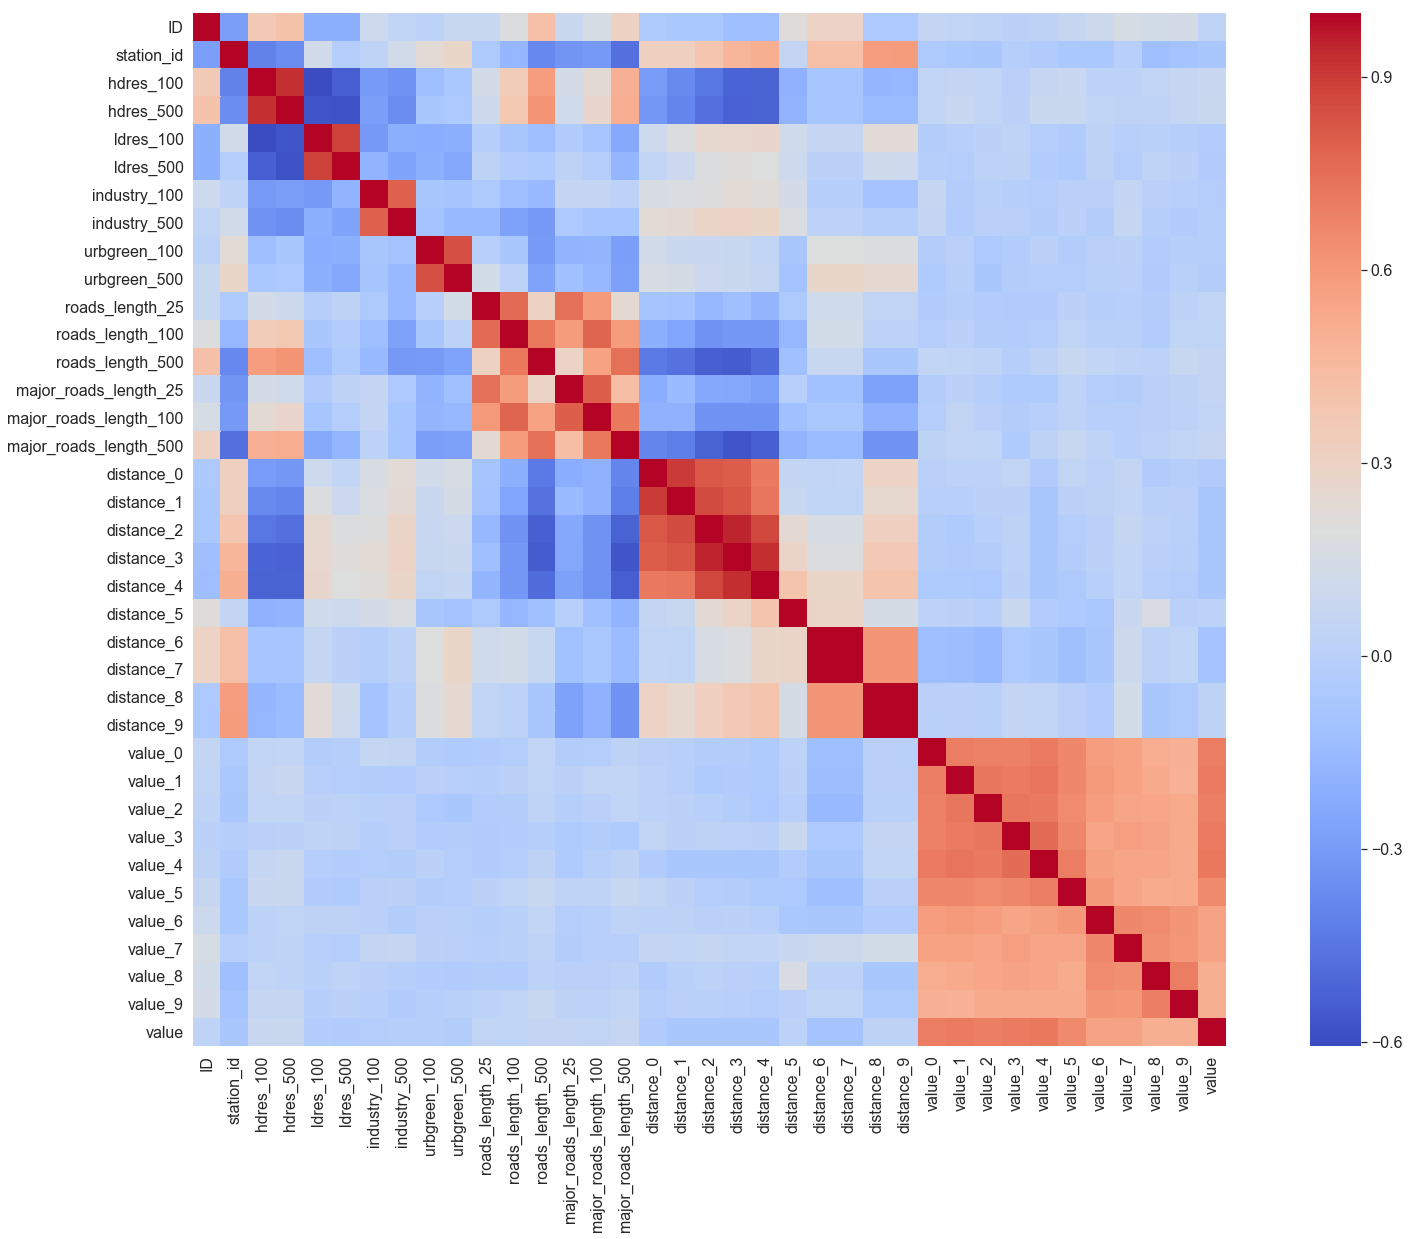

In [25]:
#correlation matrix
corrmat = data.corr()

#Plot a heatmap to visualize the correlations
f, ax = plt.subplots(figsize=(30, 19))
sns.set(font_scale=1.45)
sns.heatmap(corrmat, square=True,cmap='coolwarm');

In [30]:
correlations = corrmat["value"].sort_values(ascending=False)
correlations[0:19]

value                     1.000000000000000
value_4                   0.722658067669201
value_3                   0.705146558073952
value_1                   0.705131904114127
value_0                   0.705016029084346
value_2                   0.694475520323267
value_5                   0.656449514306592
value_6                   0.559368929485775
value_7                   0.558495496253862
value_8                   0.506015984619949
value_9                   0.504334150239756
hdres_500                 0.085811401362968
hdres_100                 0.083033223927991
major_roads_length_500    0.068804026862753
major_roads_length_25     0.055560715870499
roads_length_500          0.052817879404106
major_roads_length_100    0.042143907645803
roads_length_25           0.041886508248402
roads_length_100          0.037780296134494
Name: value, dtype: float64

### Permutation Importance

 <img src="https://i.imgur.com/h17tMUU.png">
 
 In this section we will answer following question:
 1. What features have the biggest impact on predictions?
 1. how to extract insights from models?

#### Prepare our data for our model

In [135]:
cols=["value","station_id","ID"]
X = data.drop(cols,axis=1)
y = data["value"]

#### Create  a sample model to calculate which feature are more important.

In [136]:
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)
rfc_model = RandomForestRegressor(random_state=0).fit(train_X, train_y)

#### Here is how to calculate and show importances with the [eli5](https://eli5.readthedocs.io/en/latest/) library:

In [137]:
perm = PermutationImportance(rfc_model, random_state=1).fit(val_X, val_y)
eli5.show_weights(perm, feature_names = val_X.columns.tolist(), top=150)

Weight,Feature
0.2055 ± 0.0088,value_0
0.1384 ± 0.0032,value_4
0.1034 ± 0.0073,value_3
0.0711 ± 0.0038,value_1
0.0687 ± 0.0025,major_roads_length_25
0.0423 ± 0.0050,value_5
0.0408 ± 0.0028,value_2
0.0302 ± 0.0010,distance_1
0.0272 ± 0.0011,value_8
0.0268 ± 0.0020,major_roads_length_500


1. As you move down the top of the graph, the importance of the feature decreases.
1. The features that are shown in green indicate that they have a positive impact on our prediction
1. The features that are shown in white indicate that they have no effect on our prediction
1. The most important feature was **value_0** which is logical because it corresponds to the reading from the nearest station.
1. Another thing is the feature **major_roads_length_25** which is more influential than other readings from further stations.

### Partial Dependence Plot
In this section, we see the impact of the main variables discovered in the previous sections by using the [pdpbox](https://pdpbox.readthedocs.io/en/latest/).
The goal is to visualize the impact of certain features towards model prediction for the **RandomForestRegressor** we used before.

In [203]:
features = [c for c in X]

def PDP(feature):
    # Create the data that we will plot
    pdp_goals = pdp.pdp_isolate(model=rfc_model, dataset=val_X, model_features=features, feature=feature)
    # plot it
    pdp.pdp_plot(pdp_goals, feature, figsize=(12,8))

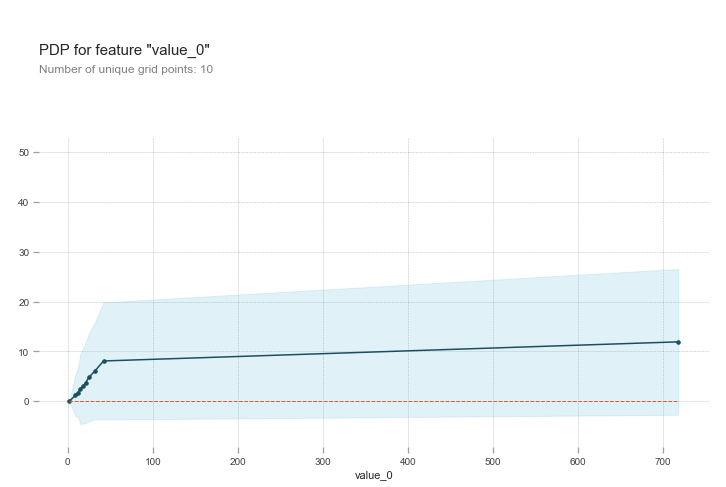

In [204]:
PDP('value_0')

- The y axis is interpreted as change in the prediction from what it would be predicted at the baseline or leftmost value.
- A blue shaded area indicates level of confidence

We can see that **value_0** has really a great influence on the model prediction. So, there is no need to plot the Partial Dependence for the different readings. Let's see for the other spatial features : 

(None, None)

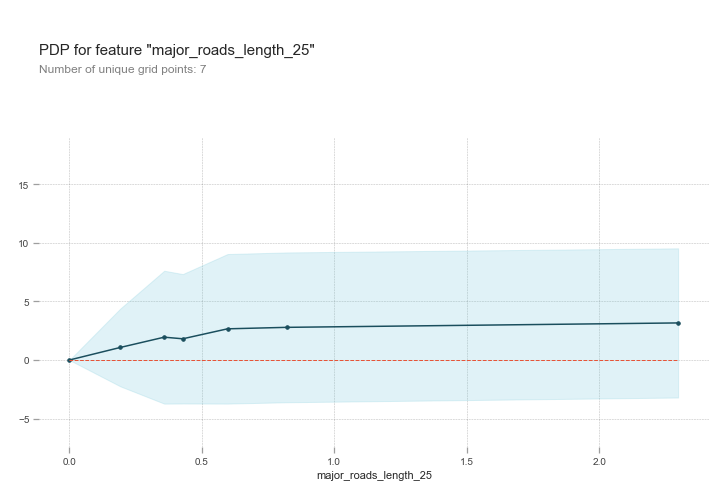

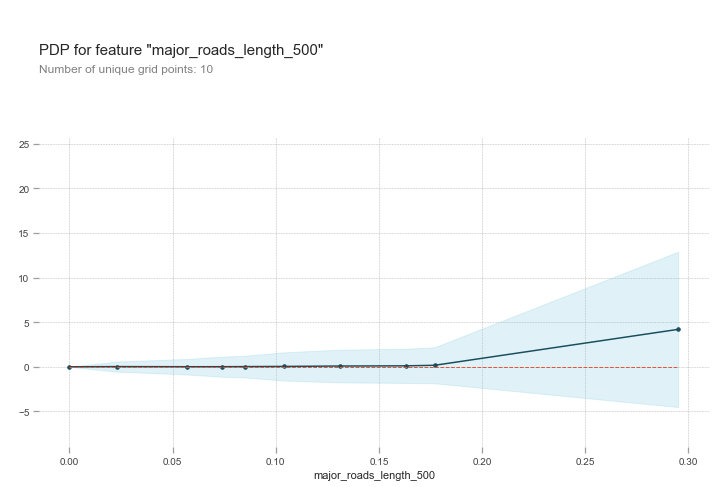

In [205]:
PDP('major_roads_length_25'),PDP('major_roads_length_500')

(None, None)

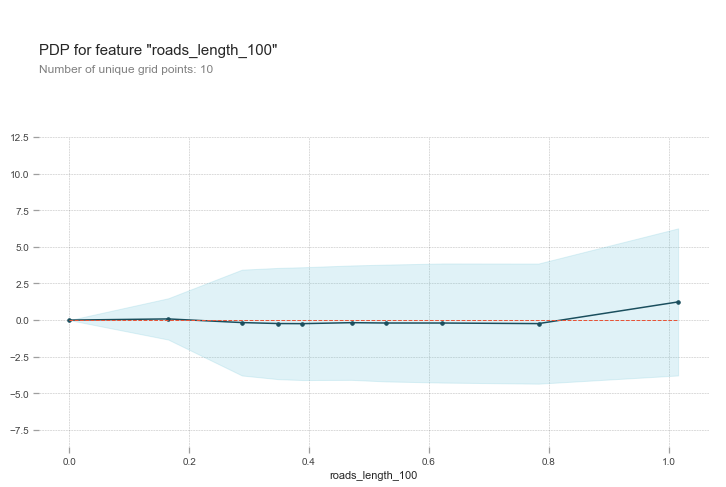

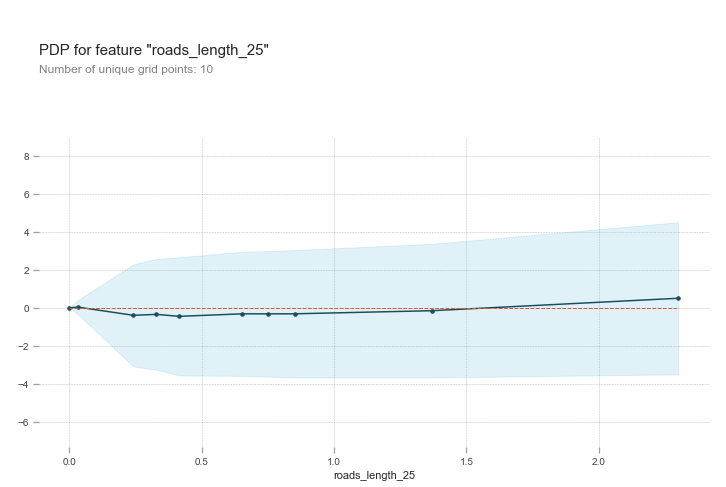

In [206]:
PDP('roads_length_100'),PDP('roads_length_25')

(None, None)

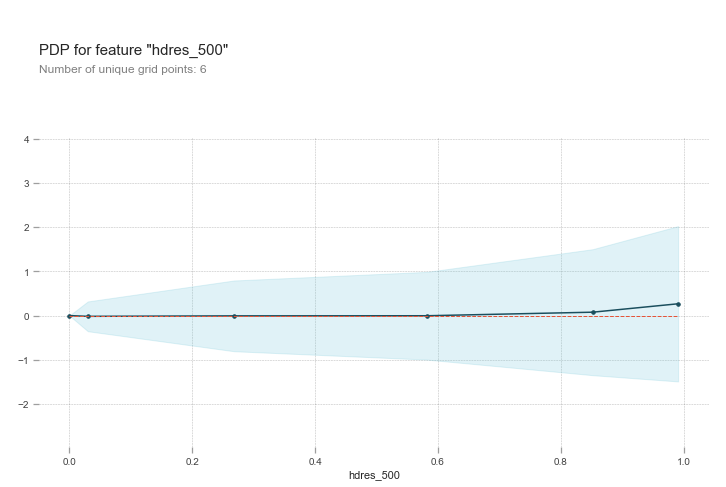

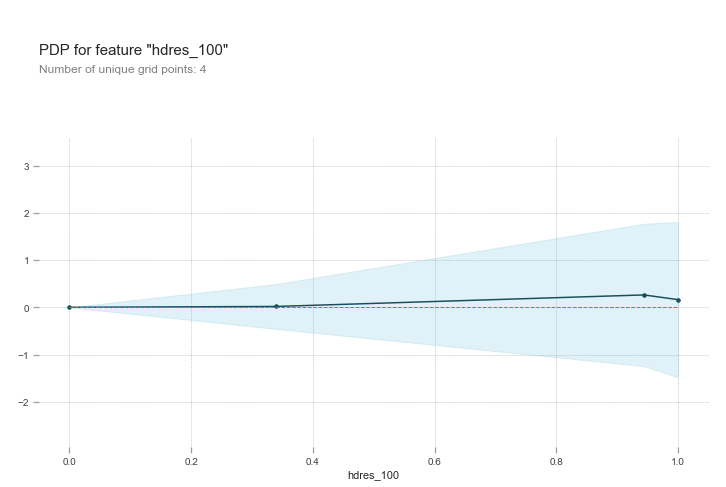

In [207]:
PDP('hdres_500'), PDP('hdres_100')

#### Conclusion

As we can see, contrary to what the confusion matrix, the spatial features with more influence on the prediction are (DESC):
1. **"major_roads_length_25" & "major_roads_length_500"**
1. **"roads_length_100" & "roads_length_25"**
1. **"hdres_500" & "hdres_100"**

As we saw before, the target variable "value" is not uniformly distributed and it's skewed towards the left . Therefore, we will try to use log to remove the skewness.

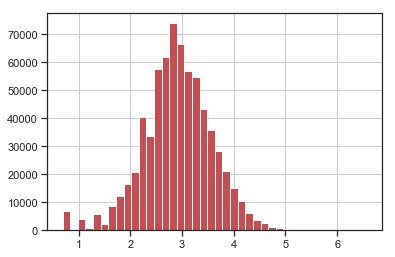

In [144]:
(np.log(data["value"])).hist(bins = 40, color='r')

It appears that adding the logarithm has made the target **value** more normally distributed. Machine Learning models tend to work much better with normally distributed targets, rather than greatly skewed targets. By transforming the values, we can improve the performance later.

In [323]:
data["LogValue"] = np.log(data["value"])
for i in cols:
    data[i] = np.log(data[i])
data.head()

,ID,station_id,hdres_100,hdres_500,ldres_100,ldres_500,industry_100,industry_500,urbgreen_100,urbgreen_500,...,value_2,value_3,value_4,value_5,value_6,value_7,value_8,value_9,value,LogValue
0,0,105,0.0,0.0,1.0,0.929,0.0,0.033,0.0,0.022,...,3.951243718581428,3.784189633918261,3.688879454113936,3.637586159726386,3.988984046564275,3.583518938456110,3.663561646129646,3.737669618283368,48.0,3.871201010907891
1,1,105,0.0,0.0,1.0,0.929,0.0,0.033,0.0,0.022,...,3.988984046564275,3.806662489770320,3.713572066704308,3.663561646129646,4.007333185232471,3.610917912644224,3.688879454113936,3.761200115693562,50.0,3.912023005428146
2,2,105,0.0,0.0,1.0,0.929,0.0,0.033,0.0,0.022,...,4.356708826689592,3.891820298110626,3.850147601710058,3.737669618283368,4.143134726391533,3.737669618283368,3.871201010907891,3.891820298110626,62.0,4.127134385045092
3,3,105,0.0,0.0,1.0,0.929,0.0,0.033,0.0,0.022,...,4.430816798843313,4.007333185232471,4.060443010546419,3.871201010907891,4.276666119016055,3.931825632724326,4.043051267834550,4.077537443905720,67.0,4.204692619390966
4,4,105,0.0,0.0,1.0,0.929,0.0,0.033,0.0,0.022,...,4.553876891600541,4.143134726391533,4.204692619390966,3.871201010907891,4.406719247264253,4.077537443905720,4.158883083359671,4.174387269895637,75.0,4.317488113536310


## Discover outliers with visualization tools
#### Box plot :

If there is an outlier it will plotted as point in boxplot but other population will be grouped together and display as boxes.

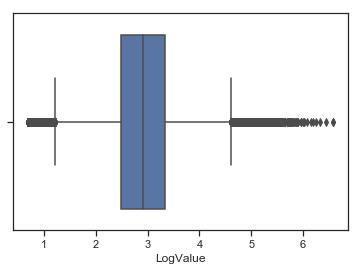

In [294]:
sns.boxplot(x=data['LogValue'])

In [21]:
data.LogValue.describe()

count    695255.000000000000000
mean          2.904049758857589
std           0.671904259356915
min           0.693147180559945
25%           2.484906649788000
50%           2.901421594082750
75%           3.332204510175204
max           6.576469569048224
Name: LogValue, dtype: float64

In [295]:
data[data.LogValue < 0.6932].shape

(6559, 38)

In [300]:
data[data.LogValue > 5.01].shape

(1889, 38)

In [324]:
#Removing outliers
data = data[(data["LogValue"] < 5.01) & (data["LogValue"] > 0.6932)]

<a id="5"></a> 
## 5- Process : ML Models

Now that we've explored the data, we can begin to build and test different models for regression to predict the Spatiotemporal PM10 concentration. In this challenge, we will use the R^2 score as well as the RMSLE to evaluate our model performance. We will also use cross validation to optimize our model hyperparameters.

In this section we will use following model:
1. Linear Regression
1. Ridge Model
1. Gradient Boosting Regression
1. Random Forest Regression
1. Xgboost
1. LGBM Regressor

In [72]:
#Importing all the librairies we'll need

from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_log_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, KFold

In [73]:
data.head()

,ID,station_id,hdres_100,hdres_500,ldres_100,ldres_500,industry_100,industry_500,urbgreen_100,urbgreen_500,...,value_2,value_3,value_4,value_5,value_6,value_7,value_8,value_9,value,LogValue
0,0,105,0.0,0.0,1.0,0.929,0.0,0.033,0.0,0.022,...,3.951243718581428,3.784189633918261,3.688879454113936,3.637586159726386,3.988984046564275,3.583518938456110,3.663561646129646,3.737669618283368,48.0,3.871201010907891
1,1,105,0.0,0.0,1.0,0.929,0.0,0.033,0.0,0.022,...,3.988984046564275,3.806662489770320,3.713572066704308,3.663561646129646,4.007333185232471,3.610917912644224,3.688879454113936,3.761200115693562,50.0,3.912023005428146
2,2,105,0.0,0.0,1.0,0.929,0.0,0.033,0.0,0.022,...,4.356708826689592,3.891820298110626,3.850147601710058,3.737669618283368,4.143134726391533,3.737669618283368,3.871201010907891,3.891820298110626,62.0,4.127134385045092
3,3,105,0.0,0.0,1.0,0.929,0.0,0.033,0.0,0.022,...,4.430816798843313,4.007333185232471,4.060443010546419,3.871201010907891,4.276666119016055,3.931825632724326,4.043051267834550,4.077537443905720,67.0,4.204692619390966
4,4,105,0.0,0.0,1.0,0.929,0.0,0.033,0.0,0.022,...,4.553876891600541,4.143134726391533,4.204692619390966,3.871201010907891,4.406719247264253,4.077537443905720,4.158883083359671,4.174387269895637,75.0,4.317488113536310


### Defining Training/Test Sets

We need to drop the "ID" and "station_id" column for the training set since those are not involved in predicting the value. We will also drop The "value" column from our training dataset and make LogValue our target instead. This will improve model performance and yield a much smaller RMSE because of the scale.

In [325]:
X_train = data.drop(["ID","station_id","value","LogValue"], axis=1)
y_train = data["LogValue"]

### Splitting into Validation

Try to split our training data again into validation sets. This will help us evaluate our model performance and maybe avoid overfitting.

In [76]:
X_training, X_valid, y_training, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=0) #X_valid and y_valid are the validation sets

<a id="51"></a> 
## 5-1 Linear Regression Model

In [71]:
lm = LinearRegression()
lm.fit(X_training,y_training)
print(lm)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)


**Model Evaluation**
Let's evaluate the model by checking out it's coefficients and how we can interpret them.

In [72]:
# print the intercept
print(lm.intercept_)

2.2240212


In [73]:
print(lm.coef_)

[-0.0762  0.0311 -0.0009 -0.1135 -0.1011 -0.0446 -0.0077 -0.0327 -0.126
  0.4908 -0.7398  0.3846 -0.9529  2.0528  0.0243 -0.0266 -0.0413  0.0324
 -0.0005  0.0002 -0.0043  0.0043  0.0088 -0.0088  0.0078  0.0044  0.0053
  0.0051  0.0064  0.0023  0.0006  0.0011  0.0019  0.0017]


**Predictions from our Model** 

In [74]:
predictions = lm.predict(X_valid)
predictions= predictions.reshape(-1,1)
submission_predictions = np.exp(predictions)
#submission_predictions = np.fmax(0,predictions)
print('RMSLE:', np.sqrt(mean_squared_log_error(y_valid, submission_predictions)))

RMSLE: 1.6623523


**Adding the GridSearchCV function**

In [77]:
linreg = LinearRegression()
parameters_lin = {"fit_intercept" : [True, False], "normalize" : [True, False], "copy_X" : [True, False]}
grid_linreg = GridSearchCV(linreg, parameters_lin, verbose=1 , scoring = "r2")
grid_linreg.fit(X_training, y_training)

print("Best LinReg Model: " + str(grid_linreg.best_estimator_))
print("Best Score: " + str(grid_linreg.best_score_))

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:   19.2s finished


Best LinReg Model: LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)
Best Score: 0.6703804598657095


In [78]:
linreg = grid_linreg.best_estimator_
linreg.fit(X_training, y_training)
lin_pred = linreg.predict(X_valid)
lin_pred = np.exp(lin_pred)
r2_lin = r2_score(np.exp(y_valid), lin_pred)
rmsle_lin = mean_squared_log_error(np.exp(y_valid), lin_pred)
print("R^2 Score: " + str(r2_lin))
print("RMSLE Score: " + str(rmsle_lin))

R^2 Score: 0.6680223189625655
RMSLE Score: 0.1085081264711648


In [78]:
scores_lin = cross_val_score(linreg, X_training, y_training, cv=10, scoring="neg_mean_squared_error")
print("Cross Validation Score: " + str(np.mean(scores_lin)))

Cross Validation Score: -0.192431977391243


<a id="52"></a> 
## 5-2 Ridge Model

In [79]:
ridge = Ridge()
parameters_ridge = {"fit_intercept" : [True, False], "normalize" : [True, False], "copy_X" : [True, False], "solver" : ["auto"]}
grid_ridge = GridSearchCV(ridge, parameters_ridge, verbose=1, scoring="r2")
grid_ridge.fit(X_training, y_training)

print("Best Ridge Model: " + str(grid_ridge.best_estimator_))
print("Best Score: " + str(grid_ridge.best_score_))

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:   12.0s finished


Best Ridge Model: Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)
Best Score: 0.6703802548960225


In [81]:
ridge = grid_ridge.best_estimator_
ridge.fit(X_training, y_training)
ridge_pred = ridge.predict(X_valid)
ridge_pred = np.exp(ridge_pred)
r2_ridge = r2_score(np.exp(y_valid), ridge_pred)
rmsle_ridge = mean_squared_log_error(np.exp(y_valid), ridge_pred)
print("R^2 Score: " + str(r2_ridge))
print("RMSLE Score: " + str(rmsle_ridge))

R^2 Score: 0.6680203052555913
RMSLE Score: 0.10850817116295212


In [67]:
scores_ridge = cross_val_score(ridge, X_training, y_training, cv=10, scoring="neg_mean_squared_error")
print("Cross Validation Score: " + str(np.mean(scores_ridge)))

Cross Validation Score: -93.19259849303438


<a id="53"></a> 
## 5-3 Lasso Model

In [85]:
lsr = Lasso(alpha=0.0002)
lsr.fit(X_training, y_training)
lsr_pred = lsr.predict(X_valid)
lsr_pred = np.exp(lsr_pred)
r2_lsr = r2_score(np.exp(y_valid), lsr_pred)
rmsle_lsr = mean_squared_log_error(np.exp(y_valid), lsr_pred)
print("R^2 Score: " + str(r2_lsr))
print("RMSLE Score: " + str(rmsle_lsr))

R^2 Score: 0.6666227172339336
RMSLE Score: 0.10914833317536912


<a id="54"></a> 
## 5-4 Gradient Boosting Regression

In [326]:
params = {'n_estimators': 250, 'max_depth': 7, 'min_samples_split': 3,
          'learning_rate': 0.1, 'loss': 'ls'}
clf = ensemble.GradientBoostingRegressor(**params)

clf.fit(X_training, y_training)

In [91]:
clf_pred=clf.predict(X_valid)
clf_pred = np.exp(clf_pred)
r2_clf = r2_score(np.exp(y_valid), clf_pred)
rmsle_clf = mean_squared_log_error(np.exp(y_valid), clf_pred)
print("R^2 Score: " + str(r2_clf))
print("RMSLE Score: " + str(rmsle_clf))

R^2 Score: 0.762343809439461
RMSLE Score: 0.0769244569091241


<a id="55"></a> 
## 5-5 Random Forest Regression

In [200]:
rfr = RandomForestRegressor(n_estimators = 30, criterion = "mse" , min_samples_split = 3, max_features = "auto")
rfr.fit(X_training, y_training)

In [92]:
rf_pred = rfr.predict(X_valid)
rf_pred = np.exp(rf_pred)
r2_rf = r2_score(np.exp(y_valid), rf_pred)
rmsle_rf = mean_squared_log_error(np.exp(y_valid), rf_pred)
print("R^2 Score: " + str(r2_rf))
print("RMSLE Score: " + str(rmsle_rf))

R^2 Score: 0.8090957331891531
RMSLE Score: 0.06470246770779996


<a id="56"></a> 
## 5-6 Xgboost

In [199]:
xgboost = XGBRegressor(learning_rate=0.1,n_estimators=800,
                                     max_depth=5, min_child_weight=0,
                                     gamma=0, subsample=0.7,
                                     colsample_bytree=0.7,
                                     objective='reg:linear', nthread=-1,
                                     scale_pos_weight=1, seed=27,
                                     reg_alpha=0.006)
xgb = xgboost.fit(X_training, y_training)

In [99]:
xgb_pred = xgb.predict(X_valid)
xgb_pred = np.exp(xgb_pred)
r2_xgb = r2_score(np.exp(y_valid), xgb_pred)
rmsle_xgb = mean_squared_log_error(np.exp(y_valid), xgb_pred)
print("R^2 Score: " + str(r2_xgb))
print("RMSLE Score: " + str(rmsle_xgb))

R^2 Score: 0.7961735352066898
RMSLE Score: 0.06747520280570679


<a id="57"></a> 
## 5-7 LGBM Regressor

In [198]:
lightgbm = LGBMRegressor(objective='regression', 
                                       num_leaves=6,
                                       learning_rate=0.2, 
                                       n_estimators=1500,
                                       max_bin=100, 
                                       bagging_fraction=0.75,
                                       bagging_freq=5, 
                                       bagging_seed=7,
                                       feature_fraction=0.2,
                                       feature_fraction_seed=7,
                                       verbose=-1,
                                       )
gbm = lightgbm.fit(X_training, y_training)

In [95]:
gbm_pred = gbm.predict(X_valid)
gbm_pred = np.exp(gbm_pred)
r2_gbm = r2_score(np.exp(y_valid), gbm_pred)
rmsle_gbm = mean_squared_log_error(np.exp(y_valid), gbm_pred)
print("R^2 Score: " + str(r2_gbm))
print("RMSLE Score: " + str(rmsle_gbm))

R^2 Score: 0.7867353935280927
RMSLE Score: 0.07016181816209818


<a id="6"></a>
# 6. Model Comparison

After applying different models and evaluating them, now we will use test data to predict the **value** with the most adequat one.

In [138]:
model_performances = pd.DataFrame({
    "Model" : ["Linear Regression", "Ridge", "Lasso","Random Forest Regressor","Gradient Boosting Regression","XGBoost","LGBM Regressor"],
    "R Squared" : [str(r2_lin)[0:5], str(r2_ridge)[0:5],str(r2_lsr)[0:5], str(r2_rf)[0:5] , str(r2_clf)[0:5], str(r2_xgb)[0:5], str(r2_gbm)[0:5]],
    "RMSLE" : [str(rmsle_lin)[0:8], str(rmsle_ridge)[0:8], str(rmsle_lsr)[0:8], str(rmsle_rf)[0:8], str(rmsle_clf)[0:8], str(rmsle_xgb)[0:8], str(rmsle_gbm)[0:8]]
})
model_performances.round(4)

print("Sorted by RMSLE:")
model_performances.sort_values(by="RMSLE")

Sorted by RMSLE:


,Model,R Squared,RMSLE
3,Random Forest Regressor,0.809,0.064702
5,XGBoost,0.796,0.067475
6,LGBM Regressor,0.786,0.070161
4,Gradient Boosting Regression,0.762,0.076924
0,Linear Regression,0.668,0.108508
1,Ridge,0.668,0.108508
2,Lasso,0.666,0.109148


<a id="7"></a>
# 7. Blending + Submission

All of the models individually achieved scores between 0.10 and 0.13, but when the predictions of those models are blended, they get about 0.090. That's because those models are actually overfitting to certain degree. They are very good at predicting a subset of values, and they fail at predicting the rest of the dataset. When their predictions are blended, those models complement each other.

### Fit on the train data

In [327]:
linreg.fit(X_train, y_train)
ridge.fit(X_train, y_train)
clf.fit(X_train, y_train)
rfr.fit(X_train, y_train)
xgb = xgboost.fit(X_train, y_train)
gbm = lightgbm.fit(X_train, y_train)

[01:01:29] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [336]:
def blend_models_predict(X):
    return ((0.125 * linreg.predict(X)) + (0.125 * ridge.predict(X)) +(0.35 * clf.predict(X)) +
            (0.125 * gbm.predict(X)) + (0.125 * rfr.predict(X)) + (0.15 * xgb.predict(X)))

In [305]:
for i in cols:
    data_test[i] = np.log(data_test[i])
data_test.head()

,ID,station_id,hdres_100,hdres_500,ldres_100,ldres_500,industry_100,industry_500,urbgreen_100,urbgreen_500,...,value_0,value_1,value_2,value_3,value_4,value_5,value_6,value_7,value_8,value_9
0,0,98,0.0,0.0,0.349,0.503,0.0,0.052,0.651,0.354,...,3.828641396489095,3.970291913552122,3.871201010907891,3.784189633918261,3.988984046564275,3.688879454113936,3.637586159726386,3.583518938456110,3.737669618283368,3.663561646129646
1,1,98,0.0,0.0,0.349,0.503,0.0,0.052,0.651,0.354,...,3.850147601710058,4.007333185232471,3.912023005428146,3.806662489770320,4.007333185232471,3.713572066704308,3.663561646129646,3.610917912644224,3.761200115693562,3.688879454113936
2,2,98,0.0,0.0,0.349,0.503,0.0,0.052,0.651,0.354,...,3.988984046564275,4.436751534363128,4.127134385045092,3.891820298110626,4.143134726391533,3.850147601710058,3.737669618283368,3.737669618283368,3.891820298110626,3.871201010907891
3,3,98,0.0,0.0,0.349,0.503,0.0,0.052,0.651,0.354,...,4.077537443905720,4.574710978503383,4.204692619390966,4.007333185232471,4.276666119016055,4.060443010546419,3.871201010907891,3.931825632724326,4.077537443905720,4.043051267834550
4,4,98,0.0,0.0,0.349,0.503,0.0,0.052,0.651,0.354,...,4.204692619390966,4.595119850134590,4.317488113536310,4.143134726391533,4.406719247264253,4.204692619390966,3.871201010907891,4.077537443905720,4.174387269895637,4.158883083359671


In [337]:
submission_predictions = blend_models_predict(data_test.drop(["ID","station_id"], axis=1))
submission_predictions = np.exp(submission_predictions)
print(submission_predictions)

[41.6184 42.1613 49.6709 ...  8.1283 10.1348 17.6347]


In [338]:
#predicted_vals1=np.fmax(submission_predictions,0)
pd.DataFrame(submission_predictions).to_csv('submissionremov44.csv') 